# **Diabetes Prediction Model**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing the data**

In [4]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.shape

(100000, 9)

### *We have in total 100,000 rows and 9 columns*

## **Data Preprocessing**

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### *There are no missing values in the data set*

In [11]:
df.duplicated().sum()

3854

### *There are 3854 duplicates*

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(96146, 9)

### *The duplicates have been dropped, we now have 96,146 rows and 9 columns*

In [16]:
df.describe(include = 'all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146.000000,96146.000000,96146.000000,96146,96146.000000,96146.000000,96146.000000,96146.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,34398,NaN,NaN,NaN,NaN
mean,NaN,41.794326,0.077601,0.040803,NaN,27.321461,5.532609,138.218231,0.088220
std,NaN,22.462948,0.267544,0.197833,NaN,6.767716,1.073232,40.909771,0.283616
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000


## **Exploratory Data Analysis**

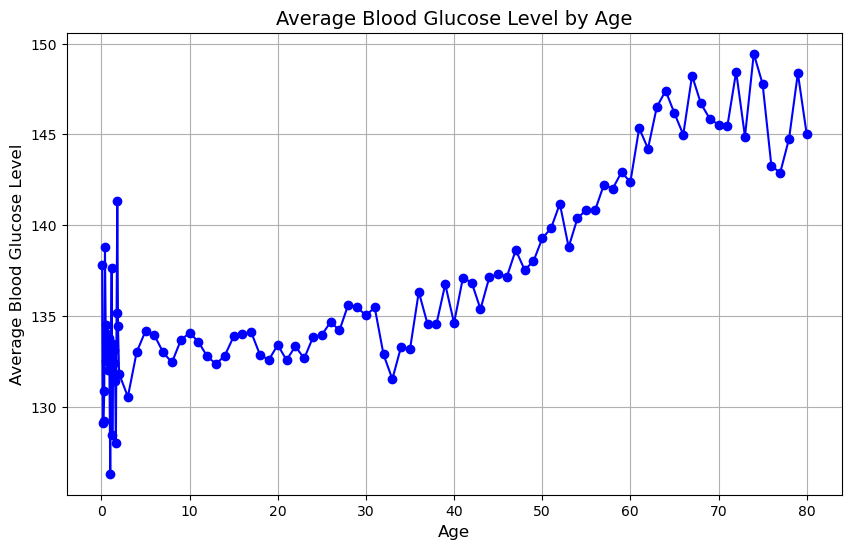

In [22]:
average_glucose_by_age = df.groupby('age')['blood_glucose_level'].mean()
plt.figure(figsize=(10, 6))
average_glucose_by_age.plot(kind='line', color='blue', marker='o')
plt.title('Average Blood Glucose Level by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Blood Glucose Level', fontsize=12)
plt.grid(True)
plt.show()


### *From the line plot, the blood glucose level tends to increase with increasing age*

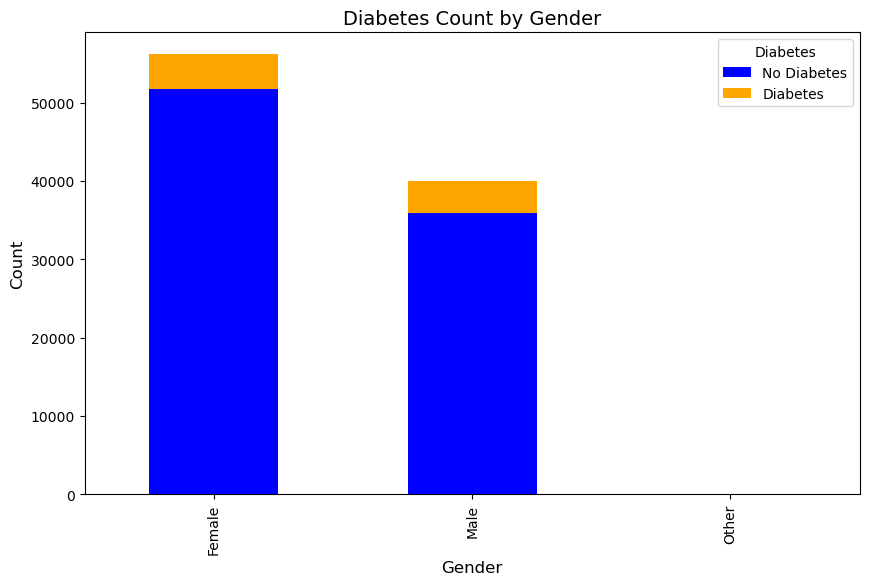

In [30]:
# Bar plot: Count of individuals with and without diabetes by gender
diabetes_count_by_gender = df.groupby(['gender', 'diabetes']).size().unstack()
diabetes_count_by_gender.plot(kind='bar', figsize=(10, 6), stacked=True, color=['blue', 'orange'])
plt.title('Diabetes Count by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['No Diabetes', 'Diabetes'], title='Diabetes')
plt.show()

### *Generally, individuals (both male and female category) with no diabetes are more than those with diabetes. Although, the female category with no diabetes are more compared to the male category)*

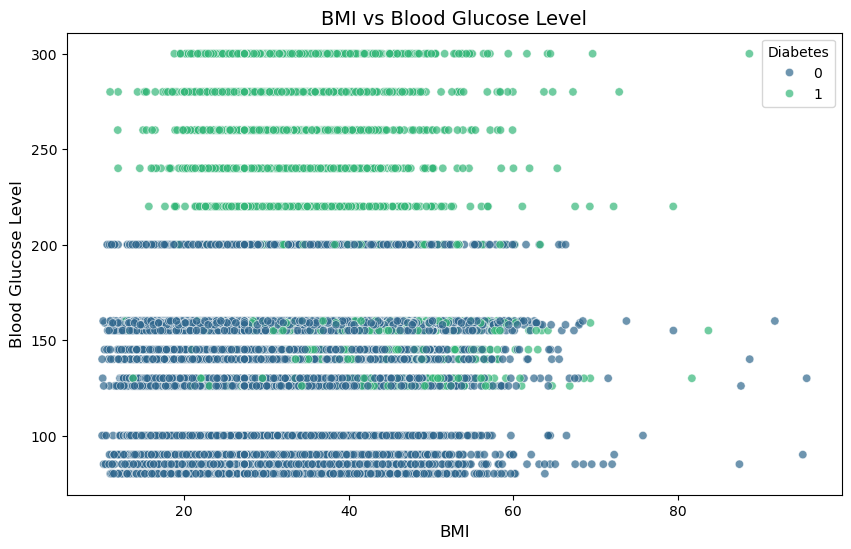

In [35]:
# Scatter plot: BMI vs Blood Glucose Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='blood_glucose_level', hue='diabetes', palette='viridis', alpha=0.7)
plt.title('BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Blood Glucose Level', fontsize=12)
plt.legend(title='Diabetes')
plt.show()

### *From the scatter plot, individuals with blood glucose level >200 and BMI between 20-40 tends to be more prone to diabetes compared to individuals with blood glucose level <200.*

## **Model Development**

### **Data Splitting**

### *Data is usually splitted into: Vertical (Features and Target), and Horizontal (Train and Test)*

#### **Vertical splitting**

In [45]:
X = df.drop(columns=df.columns[-1])

In [47]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [51]:
y=df['diabetes']

In [53]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

#### **Horizontal splitting**

In [59]:
from sklearn.model_selection import train_test_split

# To Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
46612,Female,35.0,0,0,No Info,31.53,6.6,155
31612,Female,0.4,0,0,No Info,15.19,4.0,130
96143,Female,60.0,0,0,ever,20.90,6.5,100
95691,Male,66.0,0,0,never,27.05,6.0,130
37658,Male,48.0,0,0,not current,24.05,4.8,145
...,...,...,...,...,...,...,...,...
6284,Female,12.0,0,0,No Info,20.56,6.0,160
56182,Male,62.0,0,0,former,28.34,5.7,160
79353,Female,56.0,1,0,never,27.22,6.1,200
860,Female,37.0,0,0,never,24.96,6.2,158


In [63]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,Female,5.00,0,0,No Info,15.14,4.5,90
34774,Male,19.00,0,0,never,22.74,6.6,85
71084,Female,52.00,0,0,never,24.27,7.5,220
50584,Male,55.00,0,0,No Info,27.32,5.7,85
80788,Female,22.00,0,0,never,28.78,4.5,200
...,...,...,...,...,...,...,...,...
19314,Male,10.00,0,0,No Info,25.37,4.0,200
17624,Female,15.00,0,0,No Info,19.87,6.2,160
8673,Female,0.24,0,0,No Info,27.32,5.0,140
37062,Female,50.00,0,0,No Info,27.32,4.0,145


In [65]:
y_train

46612    0
31612    0
96143    0
95691    0
37658    0
        ..
6284     0
56182    0
79353    0
860      0
15910    0
Name: diabetes, Length: 76916, dtype: int64

In [67]:
y_test

2547     0
34774    0
71084    1
50584    0
80788    0
        ..
19314    0
17624    0
8673     0
37062    0
21353    0
Name: diabetes, Length: 19230, dtype: int64

### **Model building**

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming 'column_for_label_encoding' and 'column_for_onehot_encoding' are the names of your columns

# 1. Label Encoding
label_encoder = LabelEncoder()
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender'] = label_encoder.transform(X_test['gender'])

# 2. One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for array output
encoded_data_train = onehot_encoder.fit_transform(X_train[['smoking_history']])
encoded_data_test = onehot_encoder.transform(X_test[['smoking_history']])

# Get feature names after encoding
encoded_feature_names = onehot_encoder.get_feature_names_out(['smoking_history'])

# Create DataFrames for encoded data
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoded_feature_names, index=X_train.index)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_feature_names, index=X_test.index)

# Concatenate encoded features with original DataFrames
X_train = pd.concat([X_train.drop('smoking_history', axis=1), encoded_df_train], axis=1)
X_test = pd.concat([X_test.drop('smoking_history', axis=1), encoded_df_test], axis=1)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76916 entries, 46612 to 15910
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       76916 non-null  int32  
 1   age                          76916 non-null  float64
 2   hypertension                 76916 non-null  int64  
 3   heart_disease                76916 non-null  int64  
 4   bmi                          76916 non-null  float64
 5   HbA1c_level                  76916 non-null  float64
 6   blood_glucose_level          76916 non-null  int64  
 7   smoking_history_No Info      76916 non-null  float64
 8   smoking_history_current      76916 non-null  float64
 9   smoking_history_ever         76916 non-null  float64
 10  smoking_history_former       76916 non-null  float64
 11  smoking_history_never        76916 non-null  float64
 12  smoking_history_not current  76916 non-null  float64
dtypes: float64(9), in

In [75]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
46612,0,35.0,0,0,31.53,6.6,155,1.0,0.0,0.0,0.0,0.0,0.0
31612,0,0.4,0,0,15.19,4.0,130,1.0,0.0,0.0,0.0,0.0,0.0
96143,0,60.0,0,0,20.90,6.5,100,0.0,0.0,1.0,0.0,0.0,0.0
95691,1,66.0,0,0,27.05,6.0,130,0.0,0.0,0.0,0.0,1.0,0.0
37658,1,48.0,0,0,24.05,4.8,145,0.0,0.0,0.0,0.0,0.0,1.0


#### *Both gender and smoking history have been encoded so that the model can interprete the data* 

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

#### *Applying the model to make predictions*

In [88]:
y_lr_test_pred = lr.predict(X_test)

## **Model Evaluation**

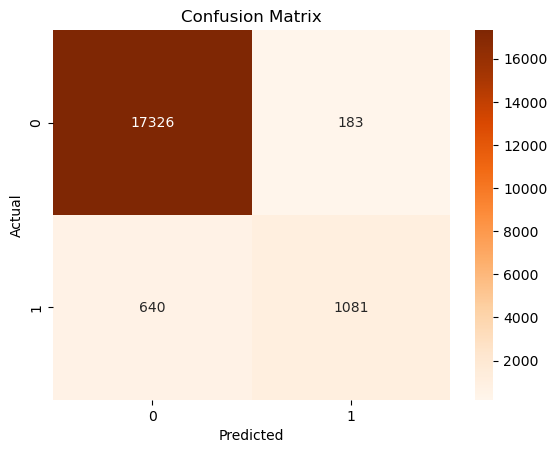

In [105]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_lr_test_pred)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### *The model predicted 17,326 cases correctly as non-diabetes, and it predicted 640 cases incorrectly as non-diabetes. It also predicted 1,081 cases correctly as diabetes, and predicted 183 cases incorrectly as diabetes*

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics calculation
accuracy = accuracy_score(y_test, y_lr_test_pred)
precision = precision_score(y_test, y_lr_test_pred)
recall = recall_score(y_test, y_lr_test_pred)
f1 = f1_score(y_test, y_lr_test_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.96
Precision: 0.86
Recall: 0.63
F1 Score: 0.72


## **Comments on Model Evaluation**

*Strengths*

The model has a very high accuracy (96%) making it reliable for ruling out non-diabetes cases.
High precision (86%) ensures that most of the positive predictions are correct.

*Weaknesses*

The recall (63%) is relatively low, indicating that the model fails to identify some true diabetes cases. 

Thus, the model is better of at predicting non-diabetic cases correctly.
